In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import glob

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def show_values(pc, fmt="%.4f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    ax = pc.axes
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='YlGn', output_path="heatmap.png"):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))
    plt.savefig(output_path, dpi=300, bbox_inches='tight')




def plot_classification_report(classification_report, title='Classification report ', cmap='YlGn', output_path="heatmap.png"):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in reversed(lines[1 : (len(lines) - 3)]):
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(float(t[-1]))
        class_names.append(t[0])
        # print(v)
        plotMat.append(v)

    # print('plotMat: {0}'.format(plotMat))
    # print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap, output_path=output_path)


In [ ]:
import csv

def parse_file(filename):
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='"')
        out = []
        for row in reader:
            new_row = [cell.replace(',', ' ') for cell in row]
            out.append(' '.join(new_row))
    return '\n'.join(out)

In [ ]:
import os

def get_best_model(x):
    best_accuracy = 0.0
    best_modelname = ""
    for root, dirs, files in os.walk(x):
        for file in files:
            if 'classification_report' in file and '.csv' in file:
                report = os.path.join(root, file)
                parsed_report = parse_file(report).splitlines()
                accuracy_line = parsed_report[-3].split()
                accuracy = float(accuracy_line[2])
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_modelname = report.replace(x, '').split('/')[1]

    return best_accuracy, best_modelname

In [ ]:
root = '/content/drive/Shareddrives/CV_videos/results_training_NN'


print("FFN", get_best_model(os.path.join(root, 'FFN')))
print("Transformer", get_best_model(os.path.join(root, 'Transformer')))
print("Recreated_pics", get_best_model(os.path.join(root, 'Recreated_pics')))
print("Subsampled",get_best_model(os.path.join(root, 'Subsampled_images')))


FFN (0.2902208201892745, 'model2_b32_ep200_lr0.001_scheduling_onemax_2023-05-09 04:00:36')
Transformer (0.30526315789473685, 'model2_b16_ep75_lr7e-05_scheduling')
Recreated_pics (0.30439358063667454, 'alexnet_b32_ep20_lr0.001')
Subsampled (0.7400634728729031, 'resnet_b32_ep5_lr0.001_scheduling_cont -  BEST')


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


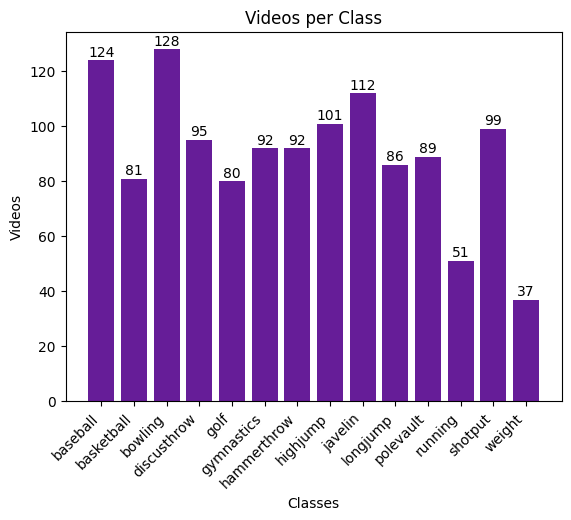

In [ ]:
# CB91_Blue = '#2CBDFE'
# CB91_Green = '#47DBCD'
# CB91_Pink = '#F3A0F2'
# CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
# CB91_Amber = '#F5B14C'

color_list = [
#  CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
    #               CB91_Purple, 
 CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

# Data
class_labels = ['baseball', 'basketball', 'bowling', 'discusthrow', 'golf', 'gymnastics', 'hammerthrow', 'highjump', 'javelin', 'longjump', 'polevault', 'running', 'shotput', 'weight']
counts = [124, 81, 128, 95, 80, 92, 92, 101, 112, 86, 89, 51, 99, 37]

# Create bar chart
fig, ax = plt.subplots()
ax.bar(class_labels, counts)

for i, v in enumerate(counts):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom')

# Add labels and title
ax.set_xlabel('Classes')
ax.set_ylabel('Videos')
ax.set_title('Videos per Class')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()


In [ ]:
report = "/content/drive/Shareddrives/CV_videos/results_training_NN/FFN/model2_b32_ep35_lr0.01_scheduling_onemax/classification_report.csv"

parsed_report = parse_file(report)

/content/drive/Shareddrives/CV_videos/results_training_NN/FFN/model2_b32_ep200_lr0.001_scheduling_onemax_2023-05-09 04:00:36/classification_report.csv /content/drive/Shareddrives/CV_videos/results_training_NN/FFN/model2_b32_ep200_lr0.001_scheduling_onemax_2023-05-09 04:00:36/classification_report_vis.png
/content/drive/Shareddrives/CV_videos/results_training_NN/FFN/model2_b32_ep200_lr0.001_scheduling_onemax_2023-05-09 04:00:36/classification_report_best_so_far.csv /content/drive/Shareddrives/CV_videos/results_training_NN/FFN/model2_b32_ep200_lr0.001_scheduling_onemax_2023-05-09 04:00:36/classification_report_best_so_far_vis.png


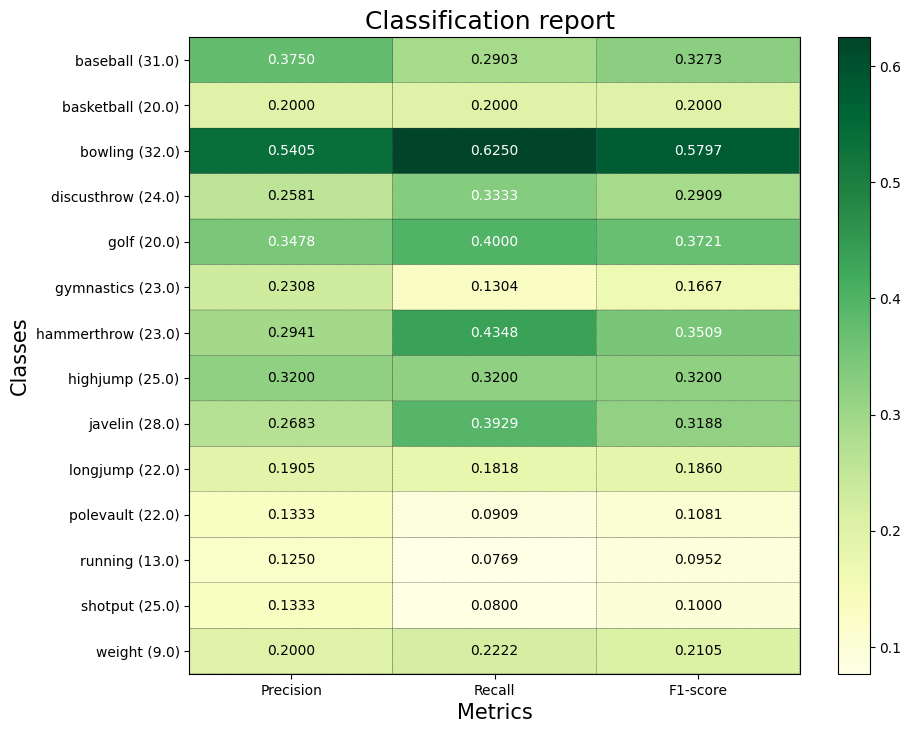

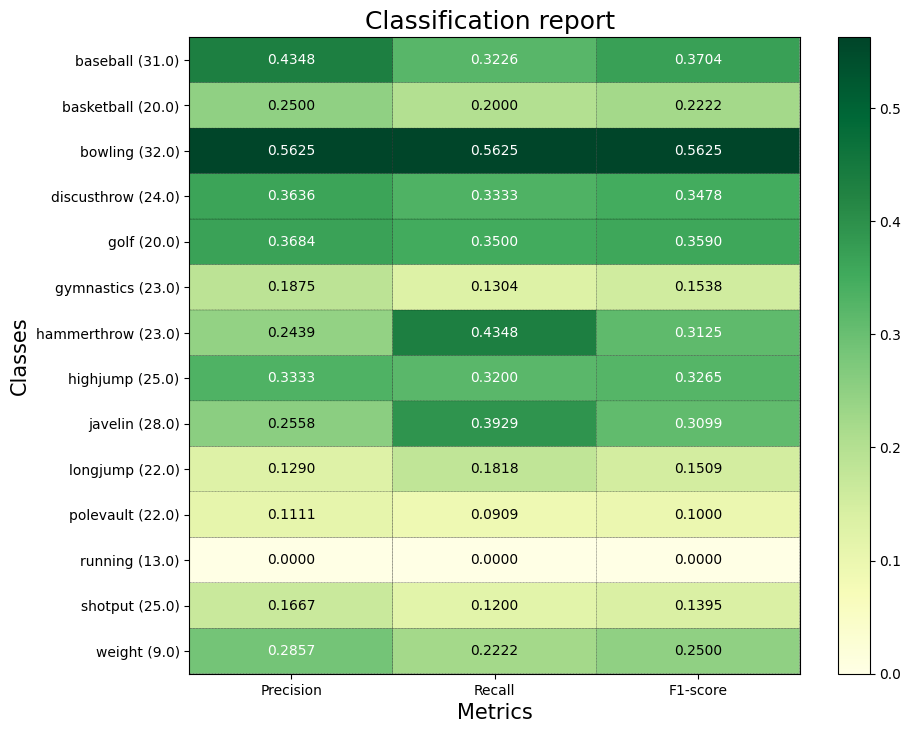

In [ ]:
import os

x = '/content/drive/Shareddrives/CV_videos/results_training_NN/FFN/model2_b32_ep200_lr0.001_scheduling_onemax_2023-05-09 04:00:36'  # replace with the actual path to the parent directory
for root, dirs, files in os.walk(x):
    for file in files:
        if 'classification_report' in file and '.csv' in file:
            report = os.path.join(root, file)
            parsed_report = parse_file(report)
            report_name = os.path.basename(report).replace(".csv", "")
            out_name = os.path.join(root, report_name + "_vis.png")
            plot_classification_report(parsed_report, output_path=out_name)
            print(report, out_name)